## Visualization in Data Science

### Amir H. Rahnama, Ph.D.

In this lecture, we will focus on visualization. Our focus will be to avoid showing abstract visualizations, but to provide you with insight on how to use visualization in your data science project. For this, we will use real datasets and show you how to use visualization throughtout the process of data analysis.

### Loading the Wisconsin Breast Cancer dataset

In [265]:
from sklearn.datasets import load_breast_cancer

d = load_breast_cancer()

d.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='|S23')

In [198]:
d.data.shape

(569, 30)

In [199]:
len(d.target)

569

In [200]:
X = d.data
y = d.target

In [201]:
d.target_names

array(['malignant', 'benign'], dtype='|S9')

In [202]:
import pandas as pd

data = pd.DataFrame(data= d.data, columns=d.feature_names)

In [203]:
malignant_filter = d.target == 0 
benign_filter = d.target == 1

malignant = data[malignant_filter]
benign = data[benign_filter]

In [204]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Visualization

Our main focus while discussing visualization will be the Matplotlib library, however we will show examples of Plotly and Seaborn library. 

Rendering a Matplotlib visualization is a 3-step process: 

1. Import the pyplot module from matplotlib:

In [205]:
import matplotlib.pyplot as plt

2. Create a figure object from the pyplot:

In [206]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

3. Create axes from the pyplot

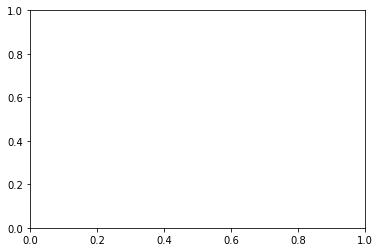

In [209]:
ax = plt.axes()

In [210]:
fig

<Figure size 432x288 with 0 Axes>

4. call the type of plot you are using on the top of the plot object:

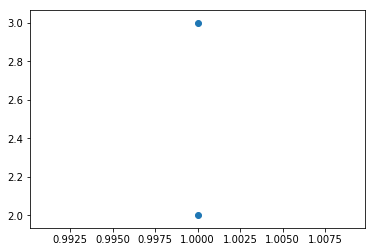

In [211]:
plt.scatter([1,1],[2,3])

### Exploratory analysis

Visualization plays an important part in exploratory analysis. When performing exploratory analysis, we are interested to summarize the data but with the help of our vision. 

#### Histogram

One of the ways you can visualize a categorical variable is to simply count how many of each there is. A histogram lets you do exactly this. In our dataset, we can treat the diagnosis label as a categorical variable:

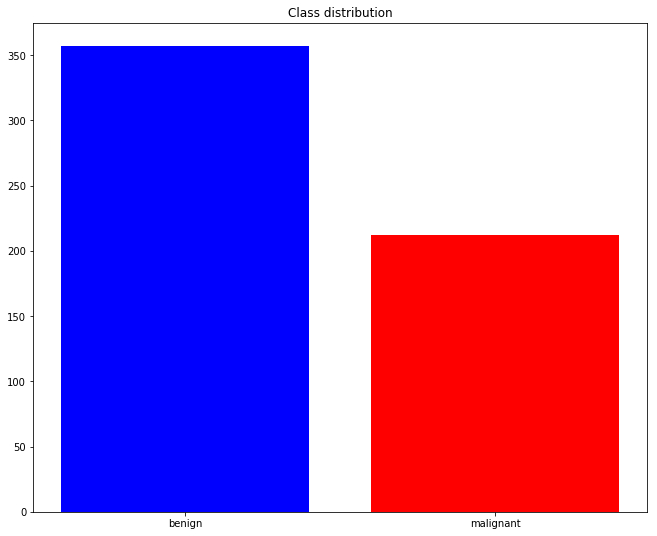

In [212]:
import matplotlib.pyplot as plt

type_data = {'malignant': len(malignant), 'benign': len(benign)}

plt.figure(figsize=(11,9))
plt.bar(type_data.keys(), type_data.values(), color=['blue', 'red'])
plt.title('Class distribution')
plt.show()

Performing a classification task in Machine Learning with unbalanced classes is dangerous. One common challenge is that it skews the accuracy of the model in the favor of the class with class with more instances. In this case, we use over-sampling so that we can introduce more instances to the malignant class. SMOTE is the method we have used in this case, however more over-sampling methods exist, such as ADASYN and RadnomSampler: 

### Oversampling

In [262]:
from imblearn.over_sampling import SMOTE, ADASYN

X_oversampled, y_oversampled = SMOTE().fit_resample(X, y)

In [263]:
data_resample = pd.DataFrame(data= X_oversampled, columns=d.feature_names)

malignant_filter_oversampled = y_oversampled == 0 
benign_filter_oversampled = y_oversampled == 1

malignant_oversampled = data_resample[malignant_filter_oversampled]
benign_oversampled = data_resample[benign_filter_oversampled]

Now let's revisit the histogram of the class distributions:

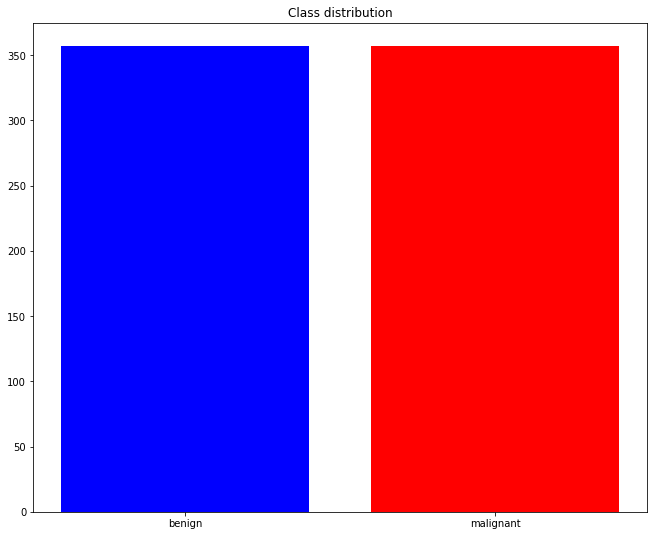

In [264]:
import matplotlib.pyplot as plt

type_data = {'malignant': len(malignant_oversampled), 'benign': len(benign_oversampled)}

plt.figure(figsize=(11,9))
plt.bar(type_data.keys(), type_data.values(), color=['blue', 'red'])
plt.title('Class distribution')
plt.show()

One of many ways that we can look at frequency of an attirbute in the data is to visualize its histogram. In histogram, we need to set a parameter called "bins" that basically divides the data into intervals and counts the frequency in each bin. Let us look at histogram of the attribute "mean radius" across both classes:

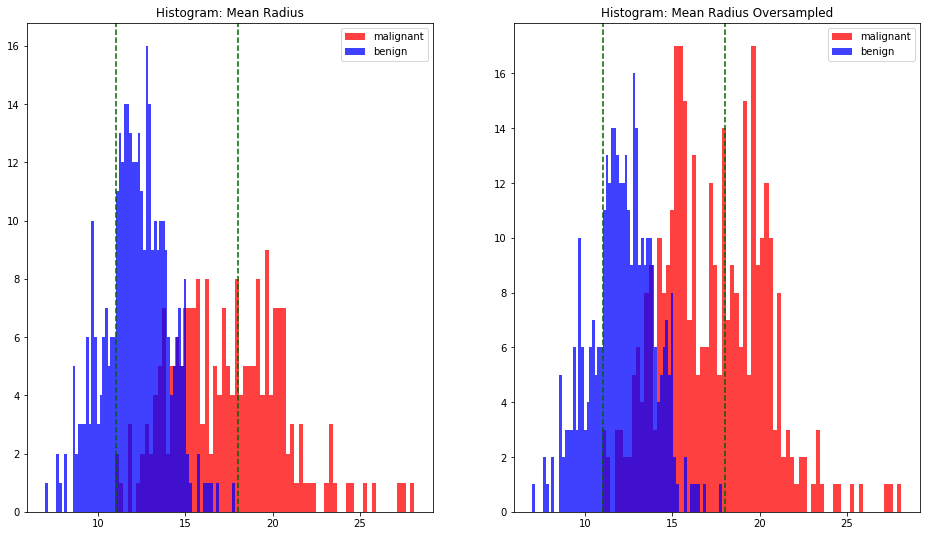

In [248]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots(1,2, figsize=(16,9)) 


ax[0].hist(malignant['mean radius'], 70, alpha=0.75, facecolor='red', label="malignant")
ax[0].hist(benign['mean radius'], 70, alpha=0.75, facecolor='blue', label="benign")
ax[0].axvline(x=11, color="darkgreen", linestyle='--')
ax[0].axvline(x=18, color="darkgreen", linestyle='--')
ax[0].legend()
ax[0].set_title('Histogram: Mean Radius')



ax[1].hist(malignant_oversampled['mean radius'], 70, alpha=0.75, facecolor='red', label="malignant")
ax[1].hist(benign_oversampled['mean radius'], 70, alpha=0.75, facecolor='blue', label="benign")
ax[1].axvline(x=11, color="darkgreen", linestyle='--')
ax[1].axvline(x=18, color="darkgreen", linestyle='--')
ax[1].legend()
ax[1].set_title('Histogram: Mean Radius Oversampled')

plt.show()

### Undersampling

In [249]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

In [250]:
data_undersample = pd.DataFrame(data= X_undersampled, columns=d.feature_names)

malignant_filter_undersample = y_undersampled== 0 
benign_filter_undersample = y_undersampled == 1

malignant_undersample = data_undersample[malignant_filter_undersample]
benign_undersample = data_undersample[benign_filter_undersample]

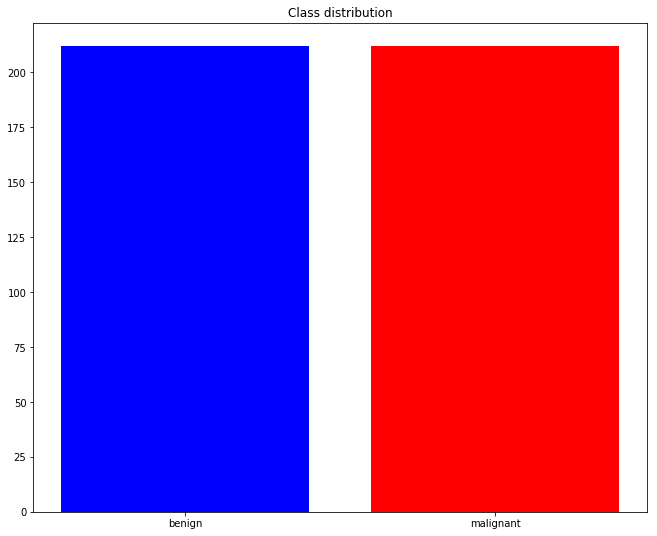

In [251]:
import matplotlib.pyplot as plt

type_data = {'malignant': len(malignant_undersample), 'benign': len(benign_undersample)}

plt.figure(figsize=(11,9))
plt.bar(type_data.keys(), type_data.values(), color=['blue', 'red'])
plt.title('Class distribution')
plt.show()

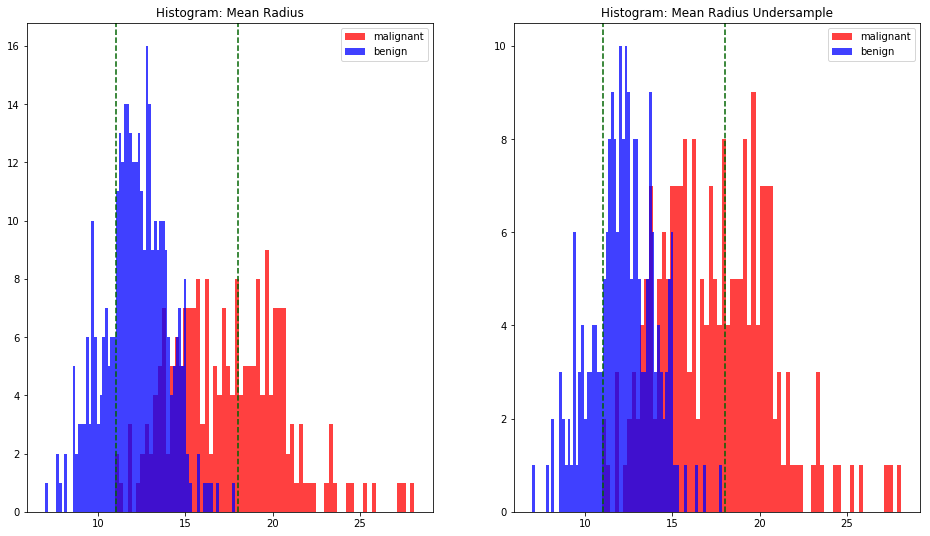

In [252]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots(1,2, figsize=(16,9)) 


# Original data
ax[0].hist(malignant['mean radius'], 70, alpha=0.75, facecolor='red', label="malignant")
ax[0].hist(benign['mean radius'], 70, alpha=0.75, facecolor='blue', label="benign")

ax[0].axvline(x=11, color="darkgreen", linestyle='--')
ax[0].axvline(x=18, color="darkgreen", linestyle='--')

ax[0].legend()
ax[0].set_title('Histogram: Mean Radius')


# Undersampled data
ax[1].hist(malignant_undersample['mean radius'], 70, alpha=0.75, facecolor='red', label="malignant")
ax[1].hist(benign_undersample['mean radius'], 70, alpha=0.75, facecolor='blue', label="benign")

ax[1].axvline(x=11, color="darkgreen", linestyle='--')
ax[1].axvline(x=18, color="darkgreen", linestyle='--')

ax[1].legend()
ax[1].set_title('Histogram: Mean Radius Undersample')

plt.show()

Cnand you see that values less than 10 and more than 18 are clearly divided in their histogram? In these two cases, we are sure the class that the data belongs to.

In both cases, we are changing the underlying distributions. Which of the approaches do you think has affected the distribution more than the other? From the visualization, one can say that the undersampling approach looks much closer to the original data. Can we confirm that with a statistical test?

### Kolmogorov-Smirnov statistic

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null hypothesis is that the distributions are the same:

In [245]:
from scipy import stats

stats.ks_2samp(malignant['mean radius'], malignant_undersample['mean radius'])

Ks_2sampResult(statistic=0.0, pvalue=1.0)

In [254]:
from scipy import stats

stats.ks_2samp(malignant['mean radius'], malignant_oversampled['mean radius'])

Ks_2sampResult(statistic=0.029253210718249545, pvalue=0.9998167750149224)

### Density Plots

Sometimes instead of using counts, you can visualize the probability density function instead, the key is to pass **density=True** inside the function:

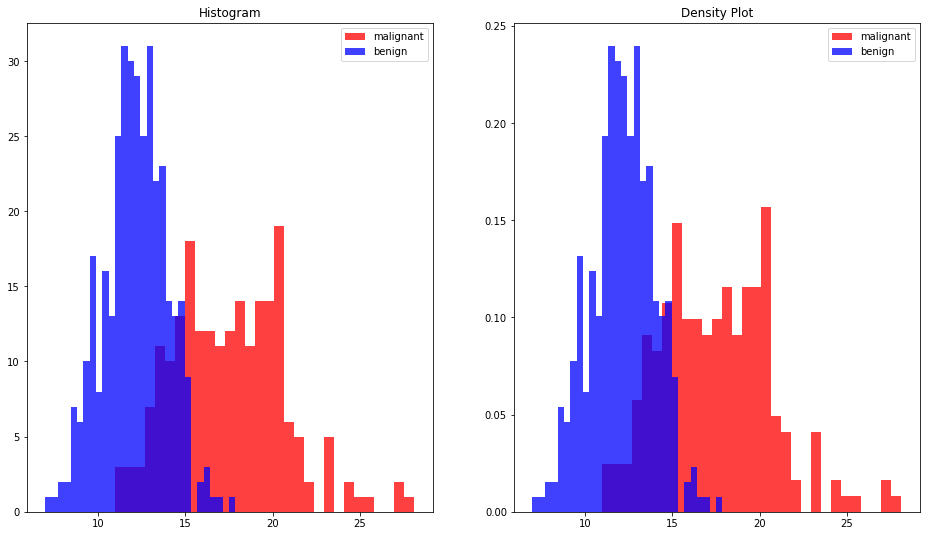

In [255]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(19680801)

fig, ax = plt.subplots(1,2, figsize=(16,9)) 

# Histogram
ax[0].hist(malignant['mean radius'], 30, alpha=0.75, facecolor='red', label="malignant")
ax[0].hist(benign['mean radius'], 30, alpha=0.75, facecolor='blue', label="benign")
ax[0].legend()
ax[0].set_title('Histogram')

# Density Plot
ax[1].hist(malignant['mean radius'], 30, alpha=0.75, density=True, facecolor='red', label="malignant")
ax[1].hist(benign['mean radius'], 30, alpha=0.75, density=True, facecolor='blue', label="benign")
ax[1].legend()
ax[1].set_title('Density Plot')

plt.show()

Now we get probablity values and not only that, the area under the chart will sum up to 1, just like a Probability Density Function (PDF). 

### Paired grid plot

It can be useful to plot two attributes against one another. From this information such as possible correlation between the variables can be shown, or depending the density of each attribute, you might be able to see clusters of points. Pair grid plot is another name for a 2 dimensional scatter plot where each axis represent one attribute and the color of points shows the class which each point represents: 

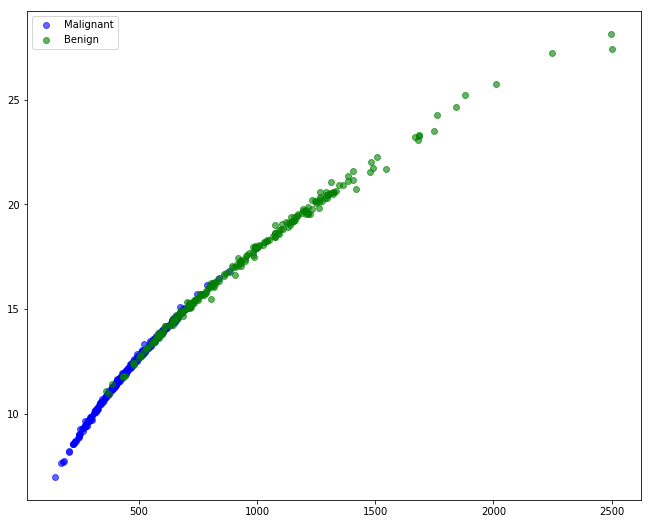

In [243]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(11,9))

plt.scatter(benign['mean area'], benign['mean radius'], c='blue', label='Malignant', alpha=0.6)
plt.scatter(malignant['mean area'], malignant['mean radius'], c='green', label='Benign', alpha=0.6)


plt.legend()
plt.show()

Sometimes when working with visualizations, not being conscious about the scales or the axes can get you in trouble. From the first look, it seems that the relationship between horizontal and vertical variables resembles the Y=X line, but it is not. Setting the axes manually will you show why. In order to make this visually more tangible, we have also visualized the Y=X line:

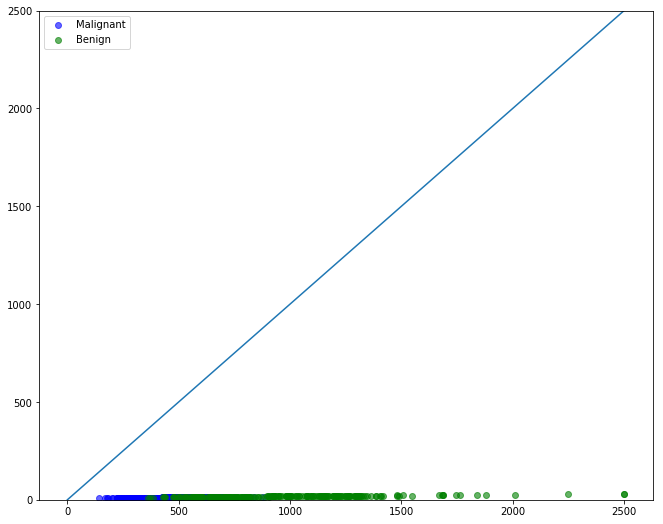

In [260]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(11,9))
plt.scatter(benign['mean area'], benign['mean radius'], c='blue', label='Malignant', alpha=0.6)
plt.scatter(malignant['mean area'], malignant['mean radius'], c='green', label='Benign', alpha=0.6)


x = np.arange(0, 2500, 1)
plt.plot(x, x)

plt.ylim(0, 2500)
plt.ylim(0, 2500)

plt.legend()
plt.show()

### Heatmap of correlations

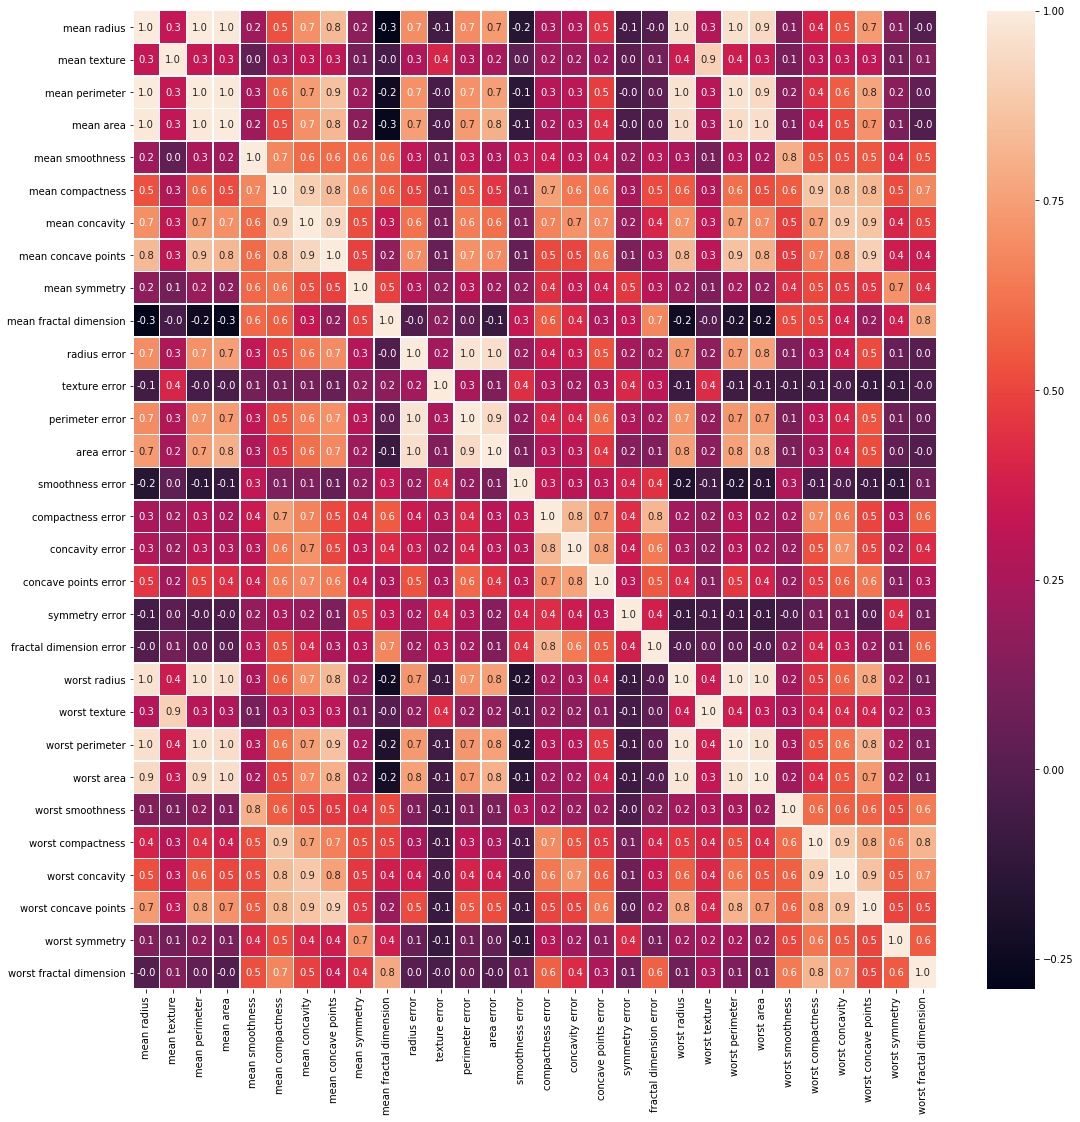

In [266]:
f,ax = plt.subplots(figsize=(18, 18))

sns.heatmap(data_undersample.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

The attributes with highest correlations are lighter than others. As you may know, the maximum value of correlation is one. Therefore the correlation of every attribute with itself is 1, i.e. **corr(X,X) = 1**.  It is interesting to see some variables are in completely correlation of others, have a look at worst perimeter and mean radius. From the heatmap we can plot the grid plot again:

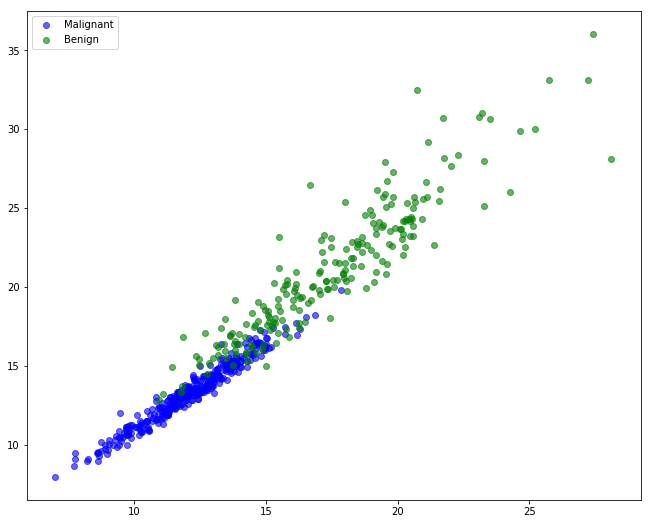

In [267]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(11,9))
plt.scatter(benign['mean radius'], benign['worst radius'], c='blue', label='Malignant', alpha=0.6)
plt.scatter(malignant['mean radius'], malignant['worst radius'], c='green', label='Benign', alpha=0.6)
plt.legend()
plt.show()

You can clearly see the correlation between two variables. What is even more interesting is that you can clearly see that masses with smaller radius and worst radius are more likely to be malignant. This might be in contradiction of the common sense that the bigger the mass is, the more likely to be a malignant mass. Since we look at the perfect case of correlation between attributes, let us look at the worst correlation:

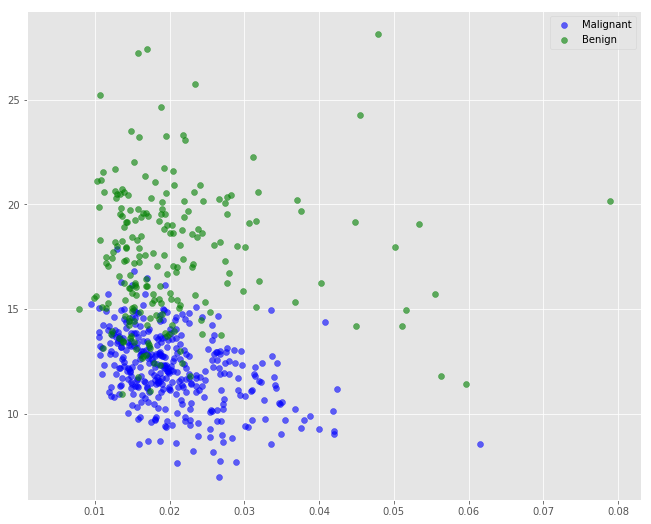

In [369]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(11,9))
plt.scatter(benign['symmetry error'], benign['mean radius'], c='blue', label='Malignant', alpha=0.6)
plt.scatter(malignant['symmetry error'], malignant['mean radius'], c='green', label='Benign', alpha=0.6)
plt.legend()
plt.show()

### Violin plot (Density, Quantiles and even more)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

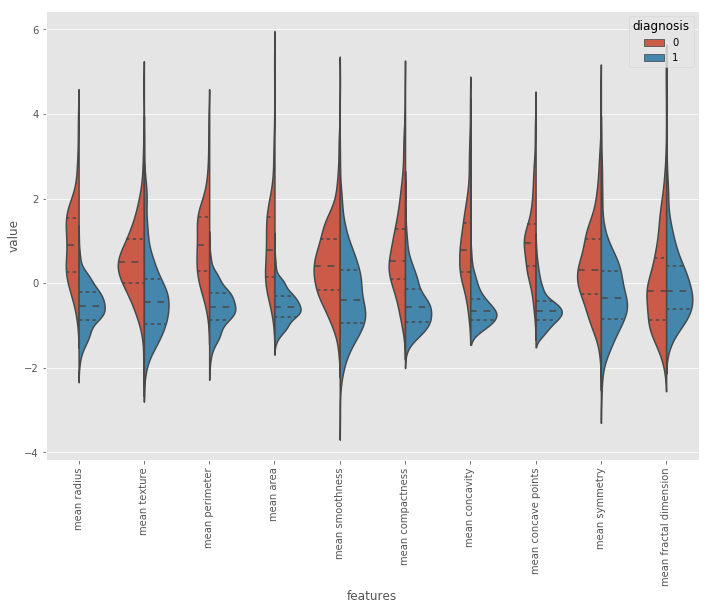

In [317]:
from matplotlib import pyplot

a4_dims = (11.7, 8.27)

data_n_2 = (data - data.mean()) / (data.std())             
data_first_ten = pd.concat([data['diagnosis'],data_n_2.iloc[:,0:10]],axis=1)
data_first_ten_flat = pd.melt(data_first_ten,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

fig, ax = pyplot.subplots(figsize=a4_dims)
v = sns.violinplot(x="features", y="value", hue="diagnosis", data=data_first_ten_flat,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

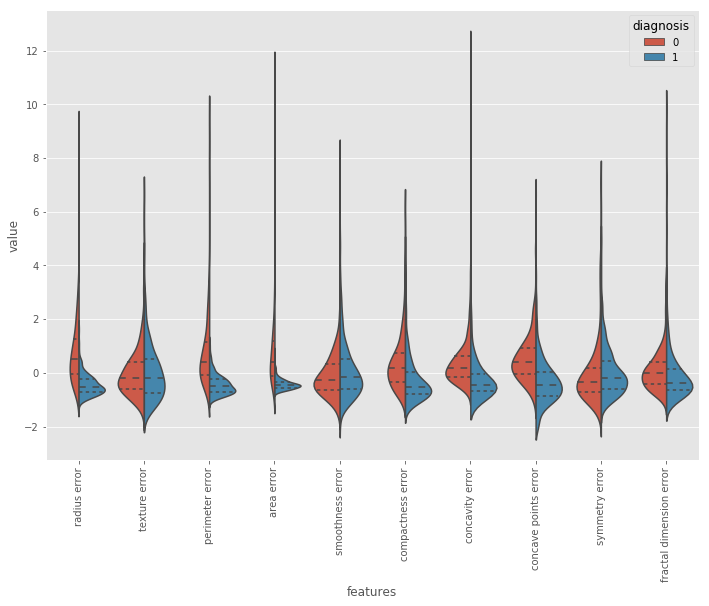

In [208]:
from matplotlib import pyplot

a4_dims = (11.7, 8.27)

data_n_2 = (data - data.mean()) / (data.std())             
data_second_ten = pd.concat([data['diagnosis'],data_n_2.iloc[:,10:20]],axis=1)
data_second_ten_flat = pd.melt(data_second_ten,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_second_ten_flat,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

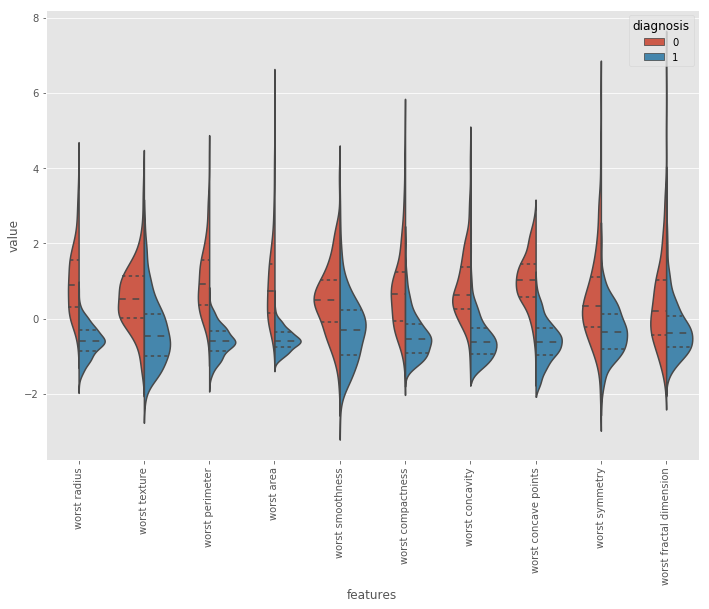

In [209]:
from matplotlib import pyplot

a4_dims = (11.7, 8.27)

data_n_2 = (data - data.mean()) / (data.std())             
data_third_ten = pd.concat([data['diagnosis'],data_n_2.iloc[:,20:30]],axis=1)
data_third_ten_flat = pd.melt(data_third_ten,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_third_ten_flat, split=True, inner="quart")
plt.xticks(rotation=90)

### Visualizations for Modelling

### Predictions

In [317]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, 
                                                    y_undersampled, test_size=0.4, random_state=0)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

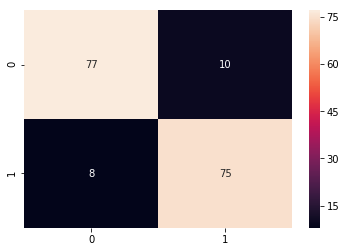

In [319]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt="d")

### Learning curve

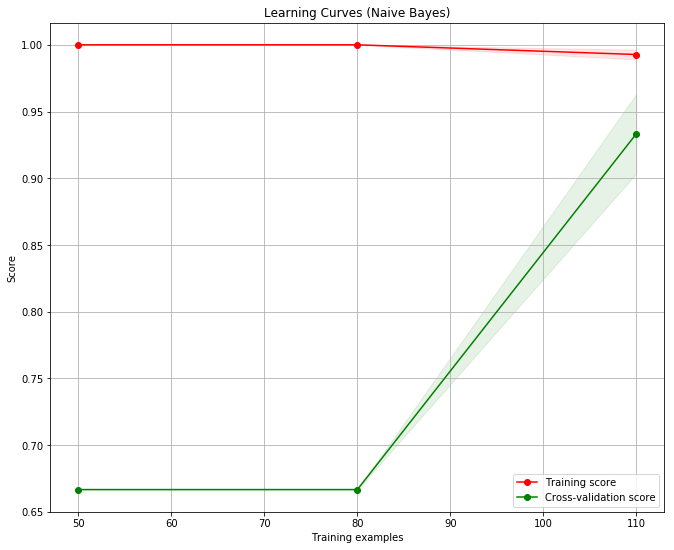

In [333]:
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits


plt.figure(figsize=(11,9))
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, valid_scores = learning_curve(clf, X, y, train_sizes=[50, 80, 110], cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

### ROC

https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

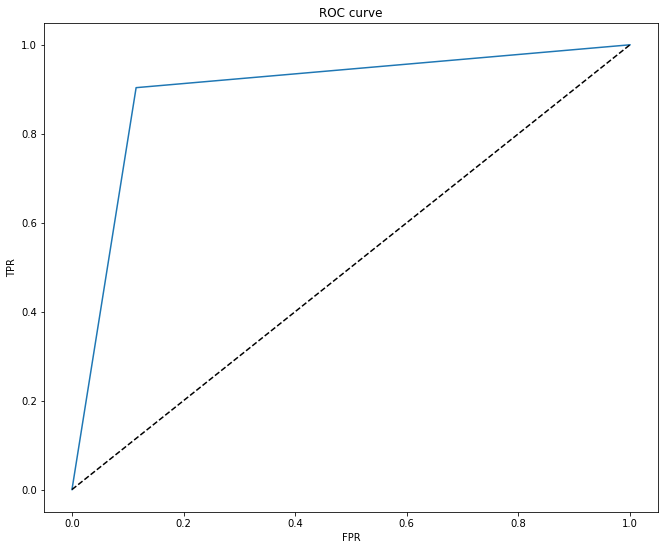

In [323]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

predictions = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.figure(figsize=(11,9))
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### Predicted vs Observed

### Graph Visualization of a model

When working with specific set of models, you can have a visualization of the model itself. The good news is that decision trees are one of those models. Let us try to see what would a typical model looks like: 

In [184]:
from sklearn import tree

tree.export_graphviz(clf, out_file='tree.dot')   

In order to read the dot files, you need to have GraphViz installed in your computer. You can find a guide on how to install graphviz here: https://graphviz.gitlab.io/download/. 

After installing graphviz, you can open your command line and run the following to convert the dot file to a PNG image file:

In [278]:
! dot tree.dot -Tpng -o tree.png

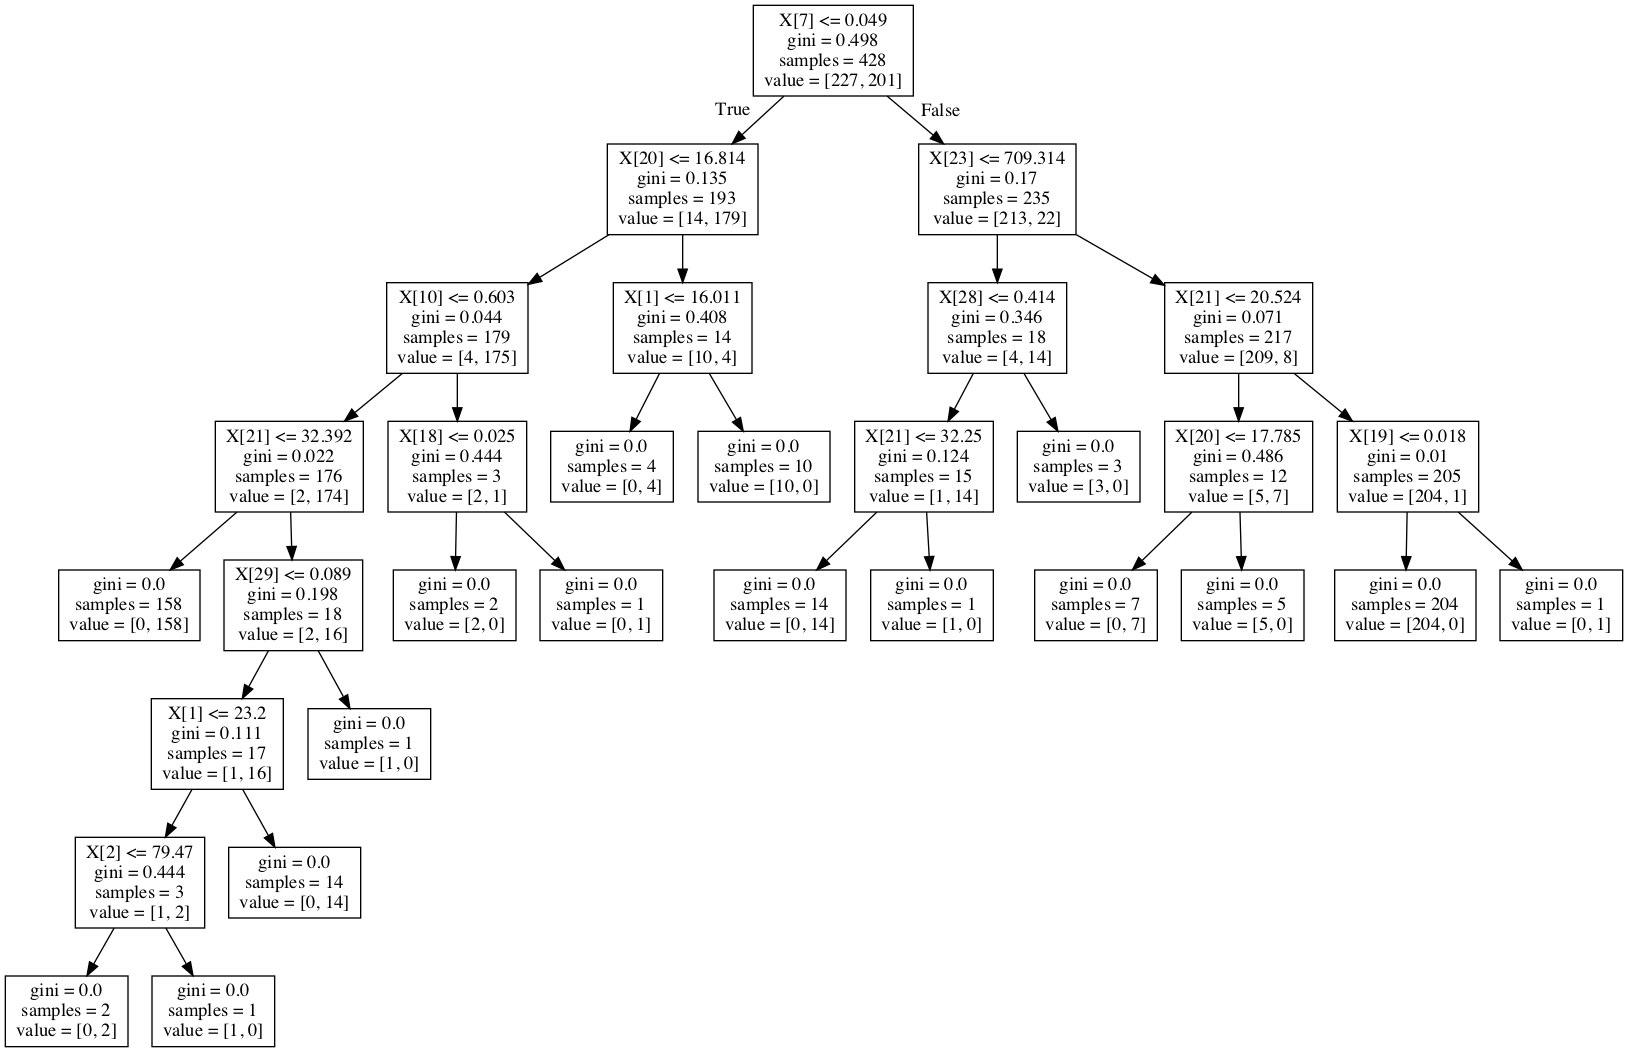

In [279]:
from IPython.display import Image
Image(filename='tree.png')

### Validation Curve

In [283]:
train_scores, valid_scores = validation_curve(clf, X, y, "alpha", np.logspace(-7, 3, 3), cv=5)

NameError: name 'validation_curve' is not defined

### Train vs test error

https://scikit-learn.org/stable/auto_examples/model_selection/plot_train_error_vs_test_error.html

### Libraries you can use 

https://github.com/reiinakano/scikit-plot

### Precision Recall

Text(0.5,1,'2-class Precision-Recall curve: AP=0.84')

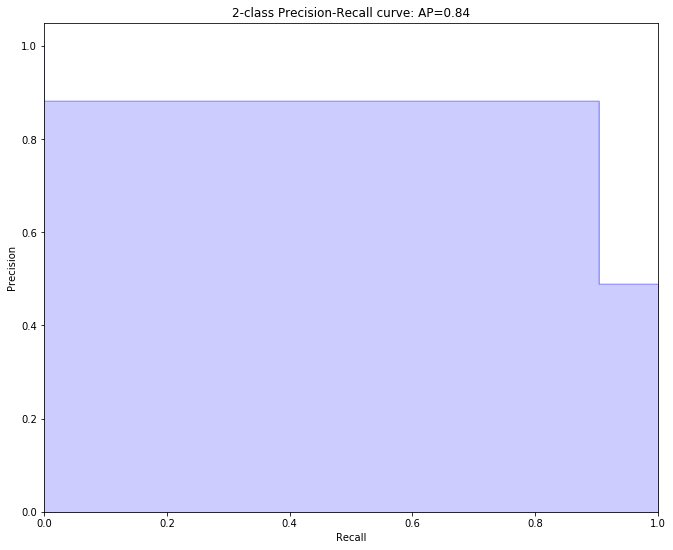

In [327]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize=(11,9))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

### Feature importance for a random forest

Feature ranking:
1. feature 27 (0.112565)
2. feature 7 (0.087250)
3. feature 20 (0.082537)
4. feature 23 (0.072407)
5. feature 6 (0.072336)
6. feature 22 (0.068590)
7. feature 2 (0.054641)
8. feature 26 (0.053042)
9. feature 0 (0.048960)
10. feature 3 (0.046322)
11. feature 25 (0.035006)
12. feature 1 (0.028217)
13. feature 13 (0.022070)
14. feature 12 (0.021993)
15. feature 24 (0.021914)
16. feature 21 (0.020815)
17. feature 5 (0.020304)
18. feature 4 (0.017176)
19. feature 16 (0.016783)
20. feature 10 (0.016687)
21. feature 17 (0.013039)
22. feature 28 (0.012619)
23. feature 15 (0.010139)
24. feature 29 (0.008892)
25. feature 8 (0.006928)
26. feature 18 (0.006422)
27. feature 19 (0.006342)
28. feature 9 (0.006045)
29. feature 14 (0.005295)
30. feature 11 (0.004664)


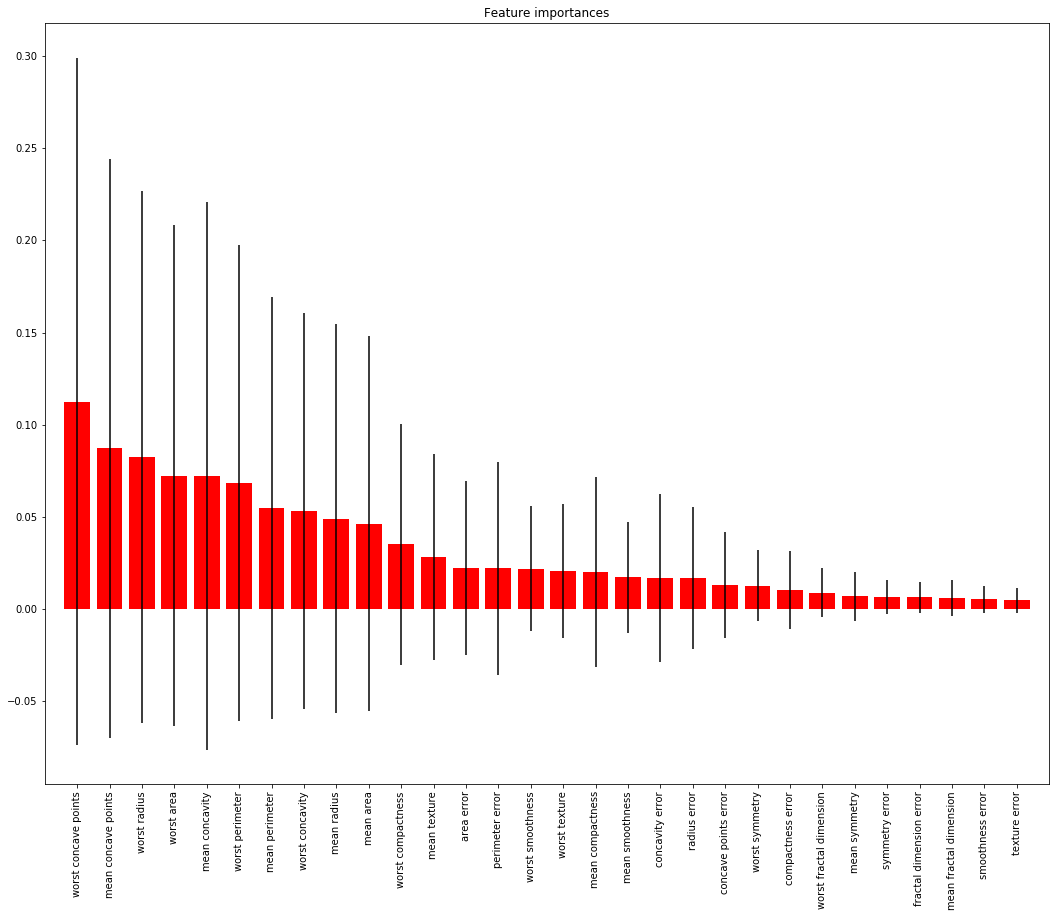

In [348]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(18, 14))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), data_undersample.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Decision Boundary Analysis

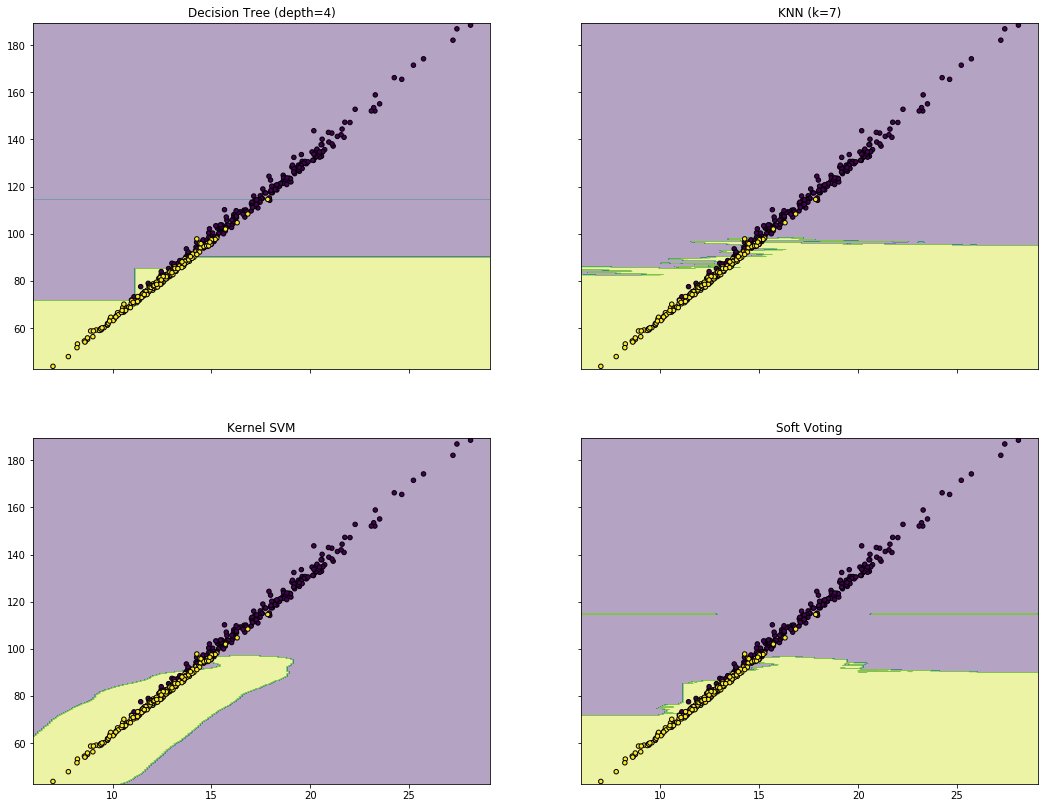

In [315]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


X_decision = X_undersampled[:, [0, 2]]
y_decision = y_undersampled

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X_decision, y_decision)
clf2.fit(X_decision, y_decision)
clf3.fit(X_decision, y_decision)
eclf.fit(X_decision, y_decision)

# Plotting decision regions
x_min, x_max = X_decision[:, 0].min() - 1, X_decision[:, 0].max() + 1
y_min, y_max = X_decision[:, 1].min() - 1, X_decision[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(18, 14))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X_decision[:, 0], X_decision[:, 1], c=y_decision,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
